In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download amarjeetkumar910/placement-csv

In [ ]:
import pandas as pd
import numpy as np
import zipfile
import os

In [ ]:
with zipfile.ZipFile('/content/placement-csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [35]:
aData = pd.read_csv('/content/Placement (1).csv')
aData.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


# Step
```
# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model
```



In [36]:
aData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   IQ          100 non-null    int64  
 3   Placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [37]:
aData.shape

(100, 4)

In [38]:
aData = aData.iloc[:,1:]

In [39]:
aData

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0
...,...,...,...
95,4.3,200,0
96,4.4,42,0
97,6.7,182,1
98,6.3,103,1


In [40]:
import matplotlib.pyplot as plt


In [50]:
aData['Placement']

,Placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


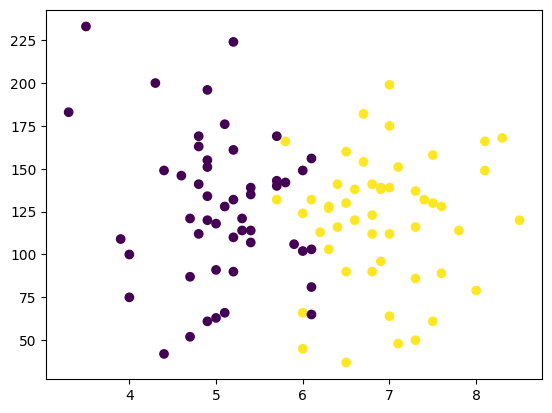

In [51]:
plt.scatter(aData.iloc[:,[0]],aData.iloc[:,[1]],c=aData['Placement'])

In [52]:
X = aData.iloc[:,0:2]
y = aData.iloc[:,-1]

In [56]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [57]:
from sklearn.model_selection import train_test_split

In [85]:
x_train ,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 2)
(20, 2)
(80,)
(20,)


In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
standardScaler = StandardScaler()

In [89]:
x_train = standardScaler.fit_transform(x_train)
x_test = standardScaler.transform(x_test)

In [90]:
x_test

array([[ 1.36840833,  0.10949567],
       [ 2.09339288,  1.07995296],
       [ 0.28093151,  0.03288063],
       [ 0.00906231, -1.5249587 ],
       [ 1.36840833, -1.65265045],
       [-1.25966065,  0.51810927],
       [-0.98779145, -0.14588782],
       [-0.98779145,  1.79502675],
       [ 0.00906231, -2.06126404],
       [ 0.73404686, -0.06927277],
       [-1.80339906, -0.65665481],
       [ 1.4590314 ,  0.05841897],
       [-0.98779145, -1.65265045],
       [ 0.00906231,  0.59472432],
       [ 1.1871622 , -1.01419171],
       [-0.17218383,  0.41595587],
       [-0.98779145,  0.74795441],
       [ 1.1871622 , -1.93357229],
       [-0.5346761 ,  0.33934082],
       [-1.89402213, -0.42680967]])

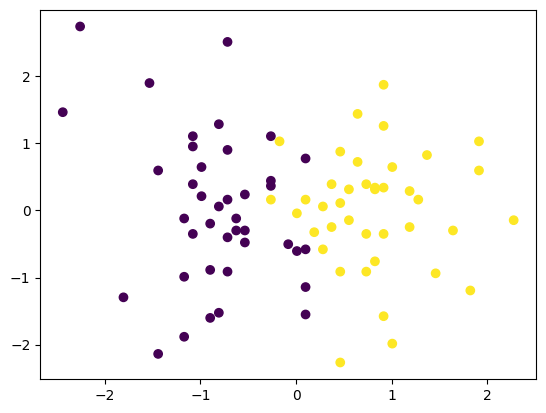

In [91]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)

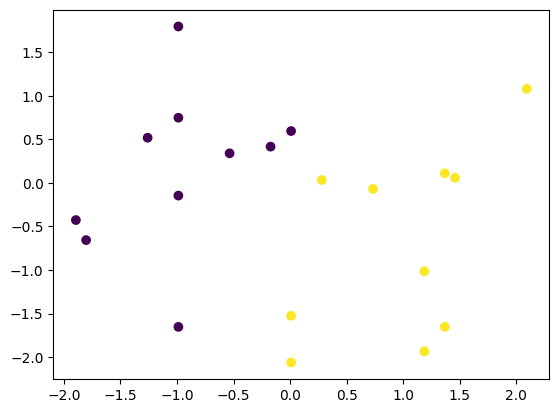

In [92]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
clf = LogisticRegression()

In [95]:
# Model traning
clf.fit(x_train,y_train)

LogisticRegression()

In [96]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [97]:
y_test.values

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy_score(y_test,y_pred)

0.85

In [100]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

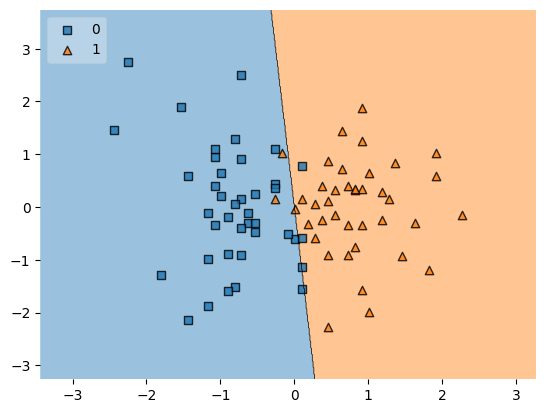

In [102]:
plot_decision_regions(x_train,y_train   .values,clf=clf,legend=2)